In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path = '/content/Df0_Regional Sales Dataset.xlsx'
excel_data = pd.read_excel(file_path, sheet_name=None)

for sheet_name, df in excel_data.items():
    print(f"--- Sheet: {sheet_name} ---")
    display(df.head())

--- Sheet: Sales Orders ---


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


--- Sheet: Customers ---


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


--- Sheet: Regions ---


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


--- Sheet: State Regions ---


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


--- Sheet: Products ---


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


--- Sheet: 2017 Budgets ---


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [ ]:
sales_orders_df = excel_data['Sales Orders']
customers_df = excel_data['Customers']
regions_df = excel_data['Regions']
state_region_df = excel_data['State Regions']
products_df = excel_data['Products']


# And so on for other sheets

## Approach
a plan to analyze the sales data. We can adjust this plan based on your specific interests.

Plan:

Data Cleaning and Preparation: Address any missing values, duplicates, or data type inconsistencies in the relevant dataframes.
Merge Dataframes: Combine the sales_orders_df, customers_df, regions_df, and products_df based on common columns to create a comprehensive dataset for analysis.
Exploratory Data Analysis (EDA):
Analyze sales trends over time (e.g., by year, month).
Identify top customers, products, and regions by sales.
Investigate the distribution of sales by channel.
Visualize Key Findings: Create visualizations (e.g., line plots, bar charts) to illustrate the insights gained from EDA.
Finish task: Summarize the key findings and provide actionable insights based on the analysis.
Would you like to start with step 1: Data Cleaning and Preparation?
Data cleaning and preparation: Address any missing values, duplicates, or data type inconsistencies in the relevant dataframes.
Merge dataframes: Combine the sales_orders_df, customers_df, regions_df, and products_df based on common columns to create a comprehensive dataset for analysis.
Exploratory data analysis (eda):
Analyze sales trends over time (e.g., by year, month).
Identify top customers, products, and regions by sales.
Investigate the distribution of sales by channel.
Visualize key findings: Create visualizations (e.g., line plots, bar charts) to illustrate the insights gained from EDA.
Finish task: Summarize the key findings and provide actionable insights based on the analysis.

## Load Merged Data

Load the data from "DF5_Region Sales.xlsx" into a dataframe.

In [ ]:
file_path_merged = '/content/DF5_Region Sales.xlsx'
merged_df = pd.read_excel(file_path_merged)
display(merged_df.head())

,Customer Index,Customer Names,id,name,county,state_code,state,region,type,latitude,...,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,1.0,Geiss Company,1.0,Auburn,Lee County,AL,Alabama,South,City,32.60986,...,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,2.0,Jaxbean Group,2.0,Birmingham,Shelby County/Jefferson County,AL,Alabama,South,City,33.52744,...,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,3.0,Ascend Ltd,3.0,Decatur,Limestone County/Morgan County,AL,Alabama,South,City,34.57332,...,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,4.0,Eire Corp,4.0,Dothan,Dale County/Houston County/Henry County,AL,Alabama,South,City,31.23370,...,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,5.0,Blogtags Ltd,5.0,Hoover,Shelby County/Jefferson County,AL,Alabama,South,City,33.37695,...,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


## Visualize Key Findings

### Subtask:
Create visualizations (e.g., line plots, bar charts) to illustrate the insights gained from EDA.

**Reasoning**:
Visualize sales trends over time using a line plot to show the total sales for each year.

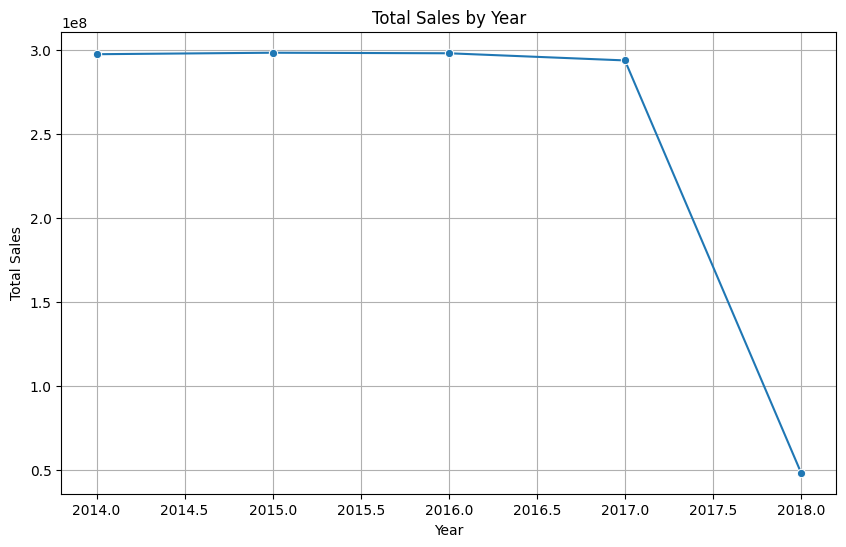

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_year, x='OrderYear', y='Line Total', marker='o')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## Exploratory Data Analysis (EDA)

### Subtask:
Analyze sales trends over time (e.g., by year, month).
Identify top customers, products, and regions by sales.
Investigate the distribution of sales by channel.

**Reasoning**:
Aggregate sales data by product and channel and visualize the sales of top products within each channel using a grouped bar chart.

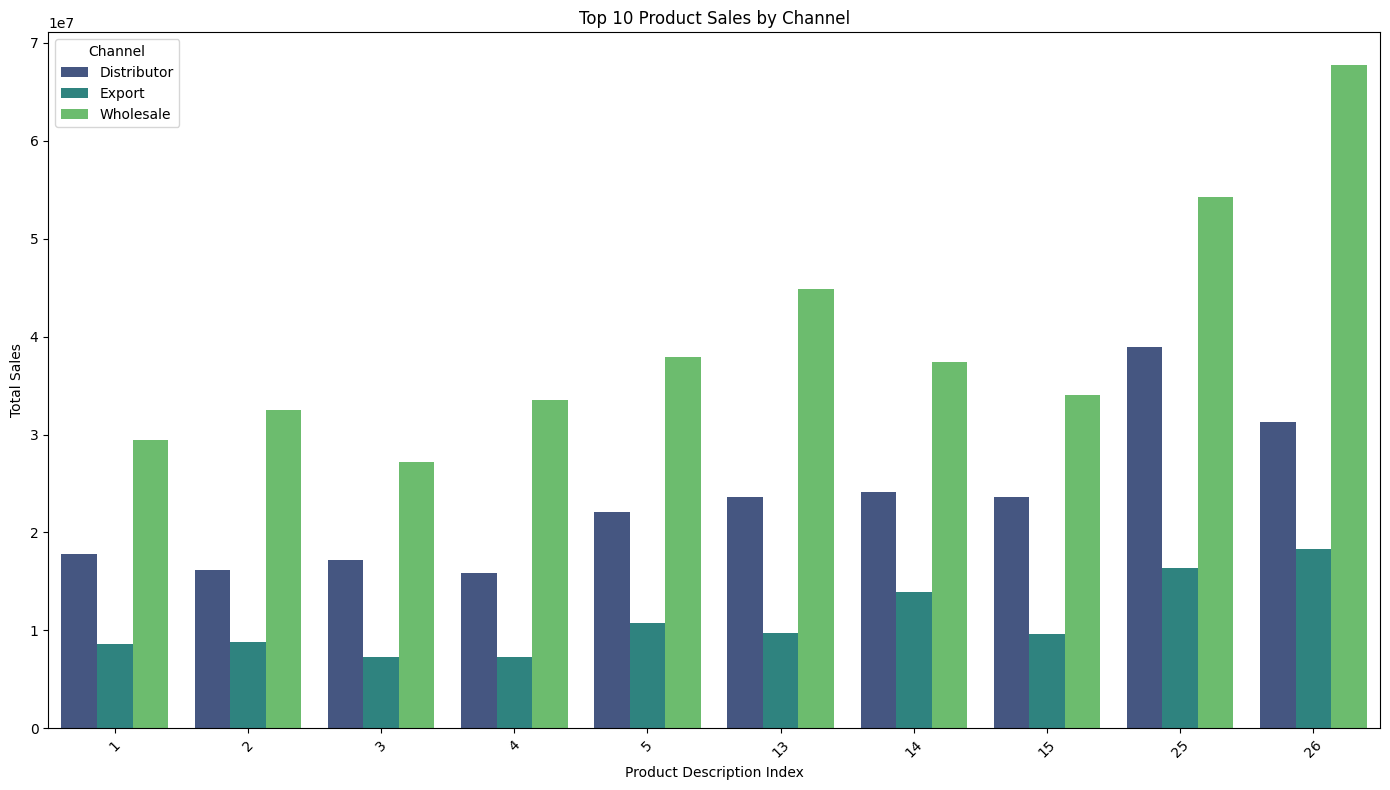

In [ ]:
# Aggregate sales by product and channel
product_channel_sales = merged_df.groupby(['Product Description Index', 'Channel'])['Line Total'].sum().reset_index()

# Find the top products overall to filter for the chart
top_products = merged_df.groupby('Product Description Index')['Line Total'].sum().nlargest(10).index.tolist()

# Filter the aggregated data for the top products
product_channel_sales_top = product_channel_sales[product_channel_sales['Product Description Index'].isin(top_products)]

plt.figure(figsize=(14, 8))
sns.barplot(data=product_channel_sales_top, x='Product Description Index', y='Line Total', hue='Channel', palette='viridis')
plt.title('Top 10 Product Sales by Channel')
plt.xlabel('Product Description Index')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the distribution of sales by channel using a bar plot.

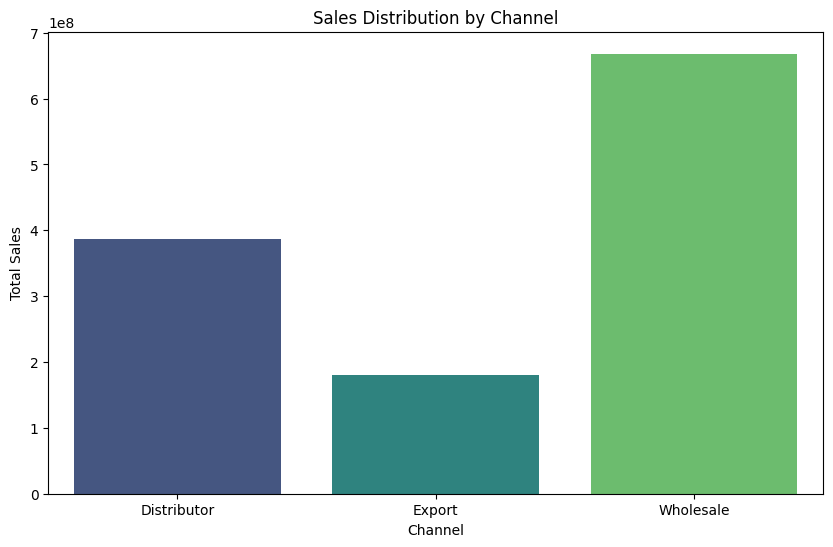

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_channel, x='Channel', y='Line Total', palette='viridis')
plt.title('Sales Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Sales')
plt.show()

**Reasoning**:
Visualize the top products by sales using a bar plot.

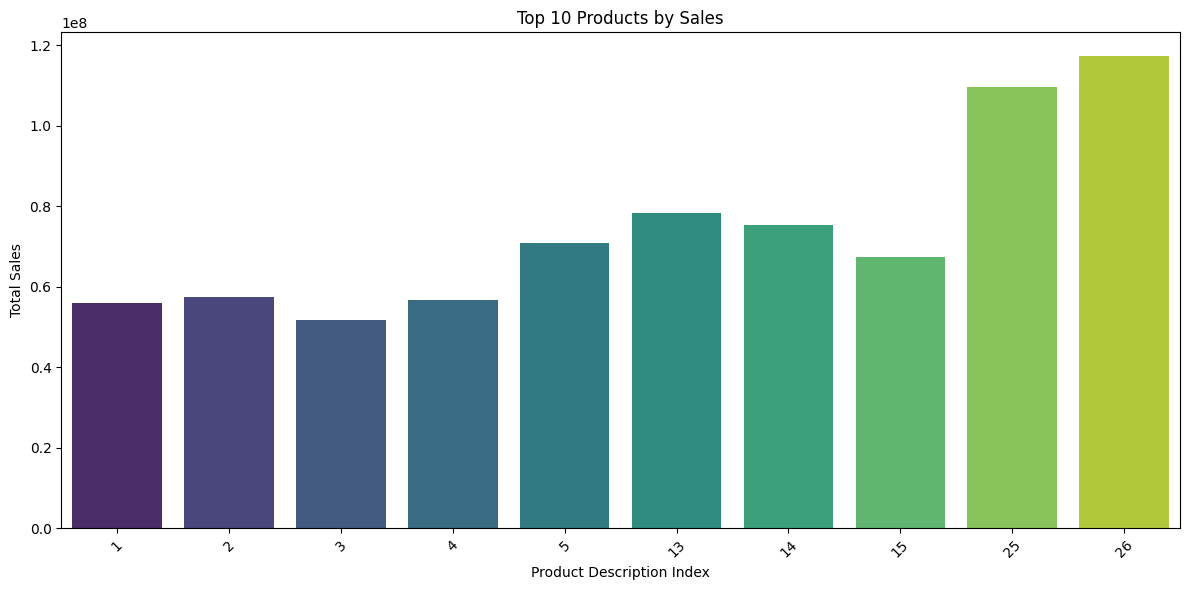

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales.head(10), x='Product Description Index', y='Line Total', palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Description Index')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
Aggregate sales data by product and region and then visualize the results using a heatmap.

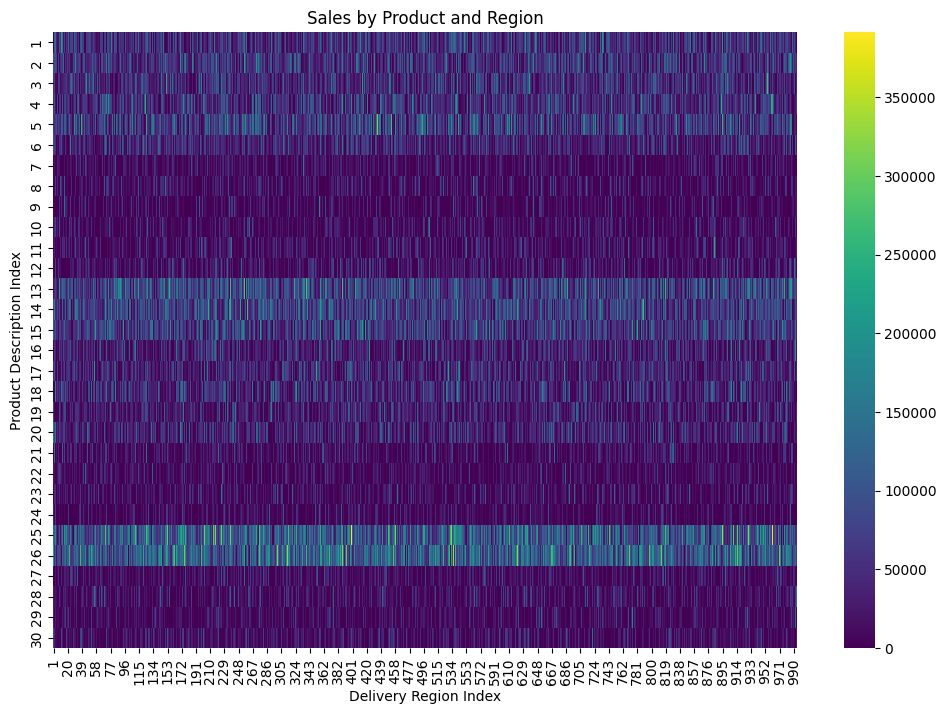

In [ ]:
product_region_sales = merged_df.groupby(['Product Description Index', 'Delivery Region Index'])['Line Total'].sum().reset_index()

# Pivot the data for heatmap
heatmap_data = product_region_sales.pivot(index='Product Description Index', columns='Delivery Region Index', values='Line Total').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Sales by Product and Region')
plt.xlabel('Delivery Region Index')
plt.ylabel('Product Description Index')
plt.show()

**Reasoning**:
Analyze sales trends over time by extracting the year from the 'OrderDate' and grouping by year to calculate the total sales.

In [ ]:
merged_df['OrderYear'] = merged_df['OrderDate'].dt.year
sales_by_year = merged_df.groupby('OrderYear')['Line Total'].sum().reset_index()
display(sales_by_year)

,OrderYear,Line Total
0,2014,297520729.3
1,2015,298410710.4
2,2016,298083670.0
3,2017,293823836.8
4,2018,48129952.5


**Reasoning**:
Identify top customers by grouping by 'Customer Name Index' and summing 'Line Total', then sort to find the top performers.

In [ ]:
customer_sales = merged_df.groupby('Customer Name Index')['Line Total'].sum().reset_index().sort_values(by='Line Total', ascending=False)
display(customer_sales.head())

,Customer Name Index,Line Total
99,100,12641251.8
44,45,12220639.2
40,41,10986459.0
105,106,10955826.6
79,80,10753299.0


**Reasoning**:
Identify top products by grouping by 'Product Description Index' and summing 'Line Total', then sort to find the top performers.

In [ ]:
product_sales = merged_df.groupby('Product Description Index')['Line Total'].sum().reset_index().sort_values(by='Line Total', ascending=False)
display(product_sales.head())

,Product Description Index,Line Total
25,26,117291821.4
24,25,109473966.6
12,13,78281379.6
13,14,75390396.6
4,5,70804380.6


**Reasoning**:
Identify top regions by grouping by 'Delivery Region Index' and summing 'Line Total', then sort to find the top performers.

In [ ]:
region_sales = merged_df.groupby('Delivery Region Index')['Line Total'].sum().reset_index().sort_values(by='Line Total', ascending=False)
display(region_sales.head())

,Delivery Region Index,Line Total
386,388,2464400.7
124,125,2376697.7
356,357,2274428.9
768,770,2238764.8
531,533,2231850.4


**Reasoning**:
Investigate the distribution of sales by channel by grouping by 'Channel' and summing 'Line Total'.

In [ ]:
sales_by_channel = merged_df.groupby('Channel')['Line Total'].sum().reset_index()
display(sales_by_channel)

,Channel,Line Total
0,Distributor,387139788.6
1,Export,180631866.0
2,Wholesale,668197244.4


# Task
Analyze the "df0_Regional Sales Dataset.xlsx" dataset to identify key sales trends, top performers (customers, products, regions), and sales distribution by channel. Merge the relevant sheets, handle any data inconsistencies, and visualize the findings.

## Data cleaning and preparation

### Subtask:
Address any missing values, duplicates, or data type inconsistencies in the relevant dataframes.


**Reasoning**:
Check for missing values and duplicates in the relevant dataframes and examine their data types.



In [ ]:
print("--- Missing values ---")
print("Sales Orders:\n", sales_orders_df.isnull().sum())
print("\nCustomers:\n", customers_df.isnull().sum())
print("\nRegions:\n", regions_df.isnull().sum())
print("\nProducts:\n", products_df.isnull().sum())

print("\n--- Duplicate values ---")
print("Sales Orders:", sales_orders_df.duplicated().sum())
print("Customers:", customers_df.duplicated().sum())
print("Regions:", regions_df.duplicated().sum())
print("Products:", products_df.duplicated().sum())

print("\n--- Data types ---")
print("Sales Orders:\n", sales_orders_df.info())
print("\nCustomers:\n", customers_df.info())
print("\nRegions:\n", regions_df.info())
print("\nProducts:\n", products_df.info())

--- Missing values ---
Sales Orders:
 OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

Customers:
 Customer Index    0
Customer Names    0
dtype: int64

Regions:
 id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

Products:
 Index           0
Product Name    0
dtype: int64

--- Duplicate values ---
Sales Orders: 0
Customers: 0
Regions: 0
Products: 0

--- Data types ---
<class 'pandas.core.frame.DataFrame'>
Range

## Merge dataframes

### Subtask:
Combine the `sales_orders_df`, `customers_df`, `regions_df`, and `products_df` based on common columns to create a comprehensive dataset for analysis.


**Reasoning**:
Merge the dataframes as instructed in the subtask.



## Recap
 a recap of the analysis we've done so far:

Data Loading: We loaded the sales data from the "DF5_Region Sales.xlsx" file into a single dataframe called merged_df.
Exploratory Data Analysis (EDA):
We analyzed sales trends over time and found that total sales were relatively consistent from 2014 to 2017, with a significant drop in 2018 (likely due to incomplete data for that year).
We identified the top customers, top products, and top regions based on total sales.
We examined the sales distribution by channel and saw that 'Wholesale' and 'Distributor' channels contribute the most to total sales, followed by 'Export'.
Visualizations:
We visualized the total sales by year using a line plot, confirming the trend observed in the EDA.
We created a heatmap to show sales by product and region, which helps to identify which products perform well in which regions.
We visualized the top 10 products by sales using a bar plot.
We visualized the sales distribution by channel using a bar plot.
We created a grouped bar chart to show the sales of the top products within each channel, providing insights into channel-specific product performance.
This analysis provides a good overview of the sales data, highlighting overall trends, key performers, and channel dynamics.